In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
import joblib
import optuna
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/FOOD-DATA-GROUP5.csv
/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/FOOD-DATA-GROUP4.csv
/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/FOOD-DATA-GROUP1.csv
/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/FOOD-DATA-GROUP3.csv
/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/FOOD-DATA-GROUP2.csv
/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/METADATA/GROUP-2_analysis_summary.csv
/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/METADATA/GROUP-4_analysis_summary.csv
/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/METADATA/Combined_FOOD_METADATA.csv
/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/METADATA/GROUP-3_analysis_summary.csv
/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/METADATA/GROUP-1_analysis_summary.csv
/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/METADATA/GROUP-5_analysis_summary.csv
/kaggle/input/food-nutrition-dataset/FINAL FOOD DATAS

In [2]:
directory="/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/"

In [3]:
dataframes = []

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        # Read the CSV file and append to the list
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,margarine with yoghurt,88,9.8,1.9,5.6,2.0,0.073,0.0,...,2.8,0.001,0.027,0.3,0.000,2.2,3.5,0.000,0.008,12.971
1,1,1,sunflower seed butter,99,8.8,0.7,6.2,1.6,3.700,1.7,...,10.2,0.300,0.700,49.8,0.300,106.6,92.2,0.075,0.800,27.500
2,2,2,hazelnut oil,120,13.6,1.0,10.6,1.4,0.000,0.0,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,13.600
3,3,3,menhaden fish oil,1966,218.0,66.3,58.2,74.5,0.000,0.0,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,218.000
4,4,4,cod liver fish oil,123,13.6,3.1,6.4,3.1,0.000,0.0,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,17.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,314,314,fontina cheese,420,33.6,20.7,9.4,1.8,1.700,1.7,...,594.0,0.087,0.200,15.1,0.030,373.7,69.1,0.052,3.800,657.400
2391,315,315,monterey cheese low fat,350,24.4,15.9,6.4,0.9,0.800,0.6,...,796.7,0.089,0.800,30.5,0.000,501.7,91.5,0.030,3.400,854.800
2392,316,316,colby cheese,445,36.3,22.8,10.5,1.1,2.900,0.6,...,774.1,0.047,0.900,29.4,0.010,516.4,143.5,0.023,3.500,841.300
2393,317,317,american cheese,93,7.9,4.5,2.1,0.3,0.900,0.6,...,261.3,0.034,0.200,6.5,0.086,160.3,33.0,0.014,0.600,274.886


In [5]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  2395 non-null   object 
 1   Caloric Value         2395 non-null   int64  
 2   Fat                   2395 non-null   float64
 3   Saturated Fats        2395 non-null   float64
 4   Monounsaturated Fats  2395 non-null   float64
 5   Polyunsaturated Fats  2395 non-null   float64
 6   Carbohydrates         2395 non-null   float64
 7   Sugars                2395 non-null   float64
 8   Protein               2395 non-null   float64
 9   Dietary Fiber         2395 non-null   float64
 10  Cholesterol           2395 non-null   float64
 11  Sodium                2395 non-null   float64
 12  Water                 2395 non-null   float64
 13  Vitamin A             2395 non-null   float64
 14  Vitamin B1            2395 non-null   float64
 15  Vitamin B11          

In [7]:
df.describe()

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000
mean,223.769520,10.176276,3.924917,4.133622,2.152844,18.589021,4.457459,13.400777,2.235790,62.171937,...,52.047728,9.581689,1.853271,34.429792,5.349964,156.236052,303.833939,52.258006,1.579192,106.929006
std,384.728244,29.008915,19.502262,12.939587,7.145738,29.406134,13.339929,32.294246,5.404483,385.352876,...,115.933379,69.912400,5.155650,71.927990,21.005332,333.257099,589.507589,199.257203,4.937509,173.023891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.500000,0.300000,0.064000,0.058000,0.071000,0.500000,0.000000,0.800000,0.000000,0.000000,...,0.600000,0.040000,0.100000,1.500000,0.037000,0.800000,27.750000,0.016000,0.055000,16.876500
50%,117.000000,2.100000,0.500000,0.500000,0.400000,6.800000,0.086000,3.500000,0.200000,0.000000,...,13.900000,0.100000,0.600000,10.400000,0.200000,42.300000,112.300000,0.053000,0.300000,53.840000
75%,258.000000,9.400000,2.700000,3.400000,1.700000,25.050000,3.200000,13.300000,2.200000,26.450000,...,48.250000,0.400000,1.800000,36.950000,0.700000,171.350000,340.500000,0.090000,1.200000,135.074500
max,6077.000000,550.700000,672.000000,291.100000,188.000000,390.200000,291.500000,560.300000,76.500000,10509.000000,...,1283.500000,1890.000000,121.200000,921.600000,451.000000,5490.000000,11336.900000,3308.000000,147.300000,3911.400000


In [8]:
X = df.drop(columns=['Nutrition Density'])
y = df['Nutrition Density']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  train_size=0.75,
                                                  random_state=42)

print(f'Train: {X_train.shape[0]} samples \t {round(X_train.shape[0] / X.shape[0] * 100)}%')
print(f'Test:  {X_test.shape[0]} samples \t {round(X_test.shape[0] / X.shape[0] * 100)}%')
print(f'Val:   {X_val.shape[0]} samples \t {round(X_val.shape[0] / X.shape[0] * 100)}%')

Train: 1437 samples 	 60%
Test:  479 samples 	 20%
Val:   479 samples 	 20%


In [10]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value =-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats',
       'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein',
       'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A',
       'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3',
       'Vitam...n B6', 'Vitamin C', 'Vitamin D', 'Vitamin E',
       'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese',
       'Phosphorus', 'Potassium', 'Selenium', 'Zinc'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 Index(['food'], dtype='object'))])

In [11]:
X_train = preprocessor.fit_transform(X_train)

X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [12]:
def objective(trial):
    params = {
        'objective': 'regression',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'goss', 'rf']),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1.0, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'max_depth': trial.suggest_int('max_depth', -1, 50),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        'min_sum_hessian_in_leaf': trial.suggest_float('min_sum_hessian_in_leaf', 1e-3, 10.0),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'min_gain_to_split': trial.suggest_float('min_gain_to_split', 0.0, 1.0),
        'max_bin': trial.suggest_int('max_bin', 15, 255),
        'boost_from_average': True,
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1e-3, 10.0),
        'is_unbalance': trial.suggest_categorical('is_unbalance', [True, False]),
        'metric': 'rmse',
        'verbosity': -1,
        'force_col_wise': trial.suggest_categorical('force_col_wise', [True, False]),
        'max_cat_threshold': trial.suggest_int('max_cat_threshold', 1, 128),
        'cat_l2': trial.suggest_float('cat_l2', 1e-3, 10.0),
        'cat_smooth': trial.suggest_float('cat_smooth', 1e-3, 10.0),
        'max_cat_to_onehot': trial.suggest_int('max_cat_to_onehot', 1, 128),
        'top_rate': trial.suggest_float('top_rate', 0.0, 1.0),
        'other_rate': trial.suggest_float('other_rate', 0.0, 1.0 - trial.suggest_float('top_rate', 0.0, 1.0)),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 1, 100),
        'max_cat_trees': trial.suggest_int('max_cat_trees', 1, 128),
        'path_smooth': trial.suggest_float('path_smooth', 0.0, 1.0),
        'feature_fraction_bynode': trial.suggest_float('feature_fraction_bynode', 0.0, 1.0),
        'tweedie_variance_power': trial.suggest_float('tweedie_variance_power', 1.0, 2.0),
    }

    model = lgb.LGBMRegressor(**params)

    early_stopping_callback = lgb.early_stopping(stopping_rounds=trial.suggest_int('early_stopping_round', 10, 100), verbose=False)

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        callbacks=[early_stopping_callback]
    )

    y_pred = model.predict(X_val)
    r2 = metrics.r2_score(y_val, y_pred)
    mae = metrics.mean_absolute_error(y_val, y_pred)
    rmse = metrics.mean_squared_error(y_val, y_pred) ** 0.5

    return r2, mae, rmse

In [13]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(directions=['maximize', 'minimize', 'minimize'])
study.optimize(objective, n_trials=60)

In [14]:
len(study.best_trials)

1

In [15]:
print(f"найкраща метрика: {study.best_trials}")

найкраща метрика: [FrozenTrial(number=5, state=TrialState.COMPLETE, values=[0.9138926520329278, 20.82956734935053, 43.8039433516353], datetime_start=datetime.datetime(2024, 7, 16, 16, 6, 25, 303182), datetime_complete=datetime.datetime(2024, 7, 16, 16, 6, 25, 604078), params={'boosting_type': 'rf', 'n_estimators': 153, 'learning_rate': 0.0890530000187336, 'num_leaves': 153, 'max_depth': 23, 'min_data_in_leaf': 24, 'min_sum_hessian_in_leaf': 8.22051818136899, 'feature_fraction': 0.8696046449823537, 'lambda_l1': 6.498965256323587e-07, 'lambda_l2': 0.01319514705909233, 'min_gain_to_split': 0.08650778774210455, 'max_bin': 87, 'scale_pos_weight': 9.982579407068018, 'is_unbalance': False, 'force_col_wise': False, 'max_cat_threshold': 121, 'cat_l2': 8.40960115651051, 'cat_smooth': 1.9302856720471997, 'max_cat_to_onehot': 56, 'top_rate': 0.708125028356839, 'other_rate': 0.059309435485147145, 'min_data_per_group': 40, 'max_cat_trees': 63, 'path_smooth': 0.15031608076346037, 'feature_fraction_by

In [16]:
data = pd.DataFrame([trial.values for trial in study.best_trials],
                    columns=['r2', 'mae', 'rmse'])

data

,r2,mae,rmse
0,0.913893,20.829567,43.803943


In [17]:
best_params = study.best_trials[0].params
best_params

{'boosting_type': 'rf',
 'n_estimators': 153,
 'learning_rate': 0.0890530000187336,
 'num_leaves': 153,
 'max_depth': 23,
 'min_data_in_leaf': 24,
 'min_sum_hessian_in_leaf': 8.22051818136899,
 'feature_fraction': 0.8696046449823537,
 'lambda_l1': 6.498965256323587e-07,
 'lambda_l2': 0.01319514705909233,
 'min_gain_to_split': 0.08650778774210455,
 'max_bin': 87,
 'scale_pos_weight': 9.982579407068018,
 'is_unbalance': False,
 'force_col_wise': False,
 'max_cat_threshold': 121,
 'cat_l2': 8.40960115651051,
 'cat_smooth': 1.9302856720471997,
 'max_cat_to_onehot': 56,
 'top_rate': 0.708125028356839,
 'other_rate': 0.059309435485147145,
 'min_data_per_group': 40,
 'max_cat_trees': 63,
 'path_smooth': 0.15031608076346037,
 'feature_fraction_bynode': 0.6274630322537907,
 'tweedie_variance_power': 1.2200790528143706,
 'early_stopping_round': 30}

In [18]:
model = lgb.LGBMRegressor(**best_params,
                          n_estimator = 1000,
                          verbose=-1)

model.fit(X_train, y_train,
          eval_set=[(X_test, y_test), (X_train, y_train)],
          eval_metric='mae')

LGBMRegressor(boosting_type='rf', cat_l2=8.40960115651051,
              cat_smooth=1.9302856720471997, early_stopping_round=30,
              feature_fraction=0.8696046449823537,
              feature_fraction_bynode=0.6274630322537907, force_col_wise=False,
              is_unbalance=False, lambda_l1=6.498965256323587e-07,
              lambda_l2=0.01319514705909233, learning_rate=0.0890530000187336,
              max_bin=87, max_cat_thresh...
              max_cat_trees=63, max_depth=23, min_data_in_leaf=24,
              min_data_per_group=40, min_gain_to_split=0.08650778774210455,
              min_sum_hessian_in_leaf=8.22051818136899, n_estimator=1000,
              n_estimators=153, num_leaves=153, other_rate=0.059309435485147145,
              path_smooth=0.15031608076346037,
              scale_pos_weight=9.982579407068018, top_rate=0.708125028356839,
              tweedie_variance_power=1.2200790528143706, verbose=-1)

In [19]:
def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [20]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,20.11,23.28
RMSE,107.59,63.60
R2,0.66,0.84


In [21]:
optuna.visualization.plot_param_importances(study)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

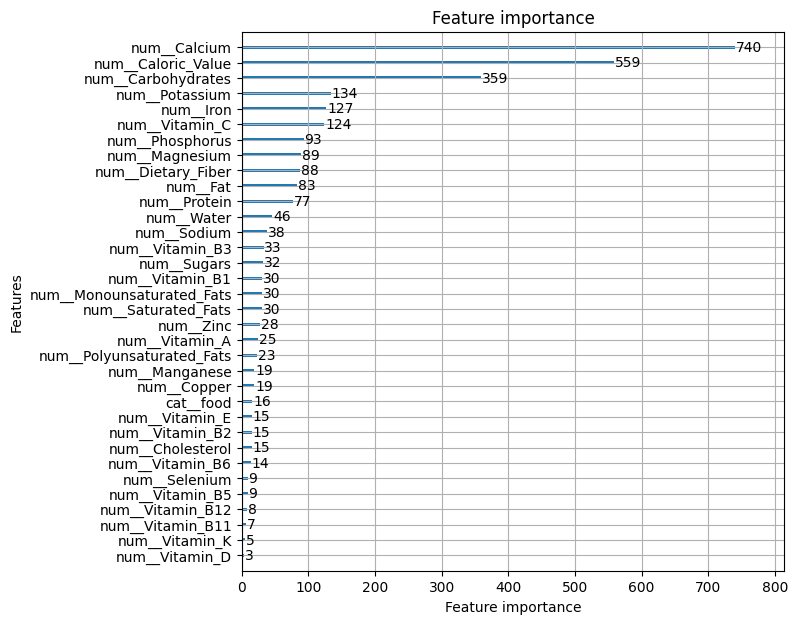

In [22]:
lgb.plot_importance(model, figsize=(7,7))

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

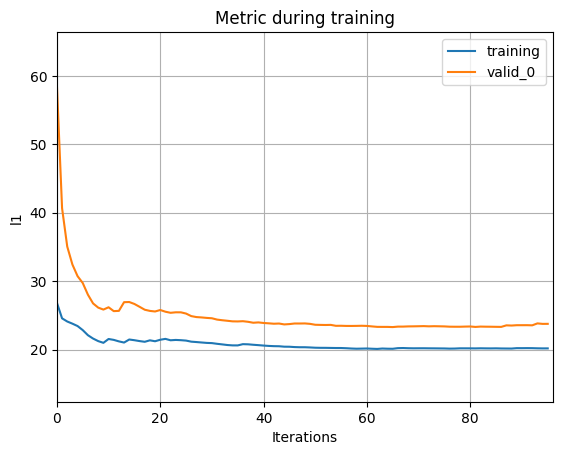

In [23]:
lgb.plot_metric(model,
                metric='l1')

In [24]:
model = Pipeline(
    [("prep", preprocessor),
     ("model", model)
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats',
       'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein',
       'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A',
       'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitam...
                               min_data_in_leaf=24, min_data_per_group=40,
                               min_gain_to_split=0.08650778774210455,
                               min_sum_hessian_in_leaf=8.22051818136899,
                               n_estimator=1000, n_estimators=153,
                               num_leaves=153, other_rate=0.059309435485147145,
                               path_smooth=0.15031608076346037,
                               scale_pos_weight=9.982579407068018,
                               top_rate=0.708125028356839,
                               tweedie_variance_power=1.2200790528143706,
                               verbose=-1))])

In [25]:
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

In [26]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats',
       'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein',
       'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A',
       'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitam...
                               min_data_in_leaf=24, min_data_per_group=40,
                               min_gain_to_split=0.08650778774210455,
                               min_sum_hessian_in_leaf=8.22051818136899,
                               n_estimator=1000, n_estimators=153,
                               num_leaves=153, other_rate=0.059309435485147145,
                               path_smooth=0.15031608076346037,
                               scale_pos_weight=9.982579407068018,
                               top_rate=0.708125028356839,
                               tweedie_variance_power=1.2200790528143706,
                               verbose=-1))])